<a href="https://colab.research.google.com/github/nicjm18/Prediccion-de-Accidentes/blob/main/Despliegue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pickle
filename = 'modelo_rf.pkl'
grid_best_model, labelencoder, variables, min_max_scaler = pickle.load(open(filename, 'rb'))

In [3]:
import joblib
columnas = joblib.load('columnas.pkl')

In [4]:
#data = pd.read_csv("crashes_despliegue.csv")
#data.head()

,Route Type,Cross-Street Type,Collision Type,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Parked Vehicle,Equipment Problems
0,US (State),County,HEAD ON LEFT TURN,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,LOOKED BUT DID NOT SEE,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MAKING U TURN,30,No,NO MISUSE
1,Maryland (State),County,SAME DIRECTION RIGHT TURN,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,UNKNOWN,UNKNOWN,FOUR OCLOCK,ONE OCLOCK,PASSENGER CAR,MAKING RIGHT TURN,35,No,AIR BAG FAILED
2,County,Maryland (State),SINGLE VEHICLE,DRY,DAYLIGHT,NO CONTROLS,ALCOHOL PRESENT,Yes,UNKNOWN,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,MOTORCYCLE,MOVING CONSTANT SPEED,50,No,NO MISUSE
3,Maryland (State),Municipality,STRAIGHT MOVEMENT ANGLE,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,No,UNKNOWN,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,40,No,NO MISUSE
4,Maryland (State),Municipality,HEAD ON LEFT TURN,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,No,NOT DISTRACTED,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,NO MISUSE


In [ ]:
import streamlit as st

st.title("Prediccion de fatalidad de accidente en Montgomery")
#1
route_options = ['Maryland (State)', 'County', 'Municipality', 'US (State)',
                 'Interstate (State)', 'Other Public Roadway', 'Ramp',
                 'Government', 'Service Road', 'Unknown']

RouteType = st.selectbox("Route Type", route_options)

#2
cross_street_options = [
    'County',
    'Maryland (State)',
    'Municipality',
    'Unknown',
    'Ramp',
    'Other Public Roadway',
    'US (State)',
    'Government',
    'Interstate (State)',
    'Service Road'
]
CrossStreetType = st.selectbox("Cross-Street Type", cross_street_options)

#3
collision_type_options = ['SAME DIR REAR END', 'STRAIGHT MOVEMENT ANGLE', 'OTHER', 'SAME DIRECTION SIDESWIPE', 'SINGLE VEHICLE', 'HEAD ON LEFT TURN', 'SAME DIRECTION RIGHT TURN', 'HEAD ON', 'SAME DIRECTION LEFT TURN', 'OPPOSITE DIRECTION SIDESWIPE', 'ANGLE MEETS LEFT TURN', 'ANGLE MEETS RIGHT TURN', 'SAME DIR BOTH LEFT TURN', 'UNKNOWN', 'ANGLE MEETS LEFT HEAD ON', 'SAME DIR REND LEFT TURN', 'SAME DIR REND RIGHT TURN', 'OP']
CollisionType = st.selectbox("Collision Type", collision_type_options)

#4
surface_condition_options = ['DRY', 'WET', 'UNKNOWN', 'ICE', 'OTHER', 'SLUSH', 'WATER(STANDING/MOVING)', 'SNOW', 'OIL', 'MUD, DIRT, GRAVEL']
SurfaceCondition = st.selectbox("Surface Condition", surface_condition_options)

#5
light_options = ['DAYLIGHT', 'DARK LIGHTS ON', 'DARK NO LIGHTS', 'DAWN', 'DUSK', 'DARK -- UNKNOWN LIGHTING', 'UNKNOWN', 'OTHER']
selected_light = st.selectbox("Light", light_options)

#6
traffic_control_options = ['NO CONTROLS', 'TRAFFIC SIGNAL', 'STOP SIGN', 'FLASHING TRAFFIC SIGNAL', 'OTHER', 'YIELD SIGN', 'UNKNOWN', 'PERSON', 'WARNING SIGN', 'RAILWAY CROSSING DEVICE', 'SCHOOL ZONE SIGN DEVICE']
TrafficControl = st.selectbox("Traffic Control", traffic_control_options)

#7
driver_substance_abuse_options = ['NONE DETECTED', 'UNKNOWN', 'ALCOHOL PRESENT', 'ALCOHOL CONTRIBUTED', 'COMBINED SUBSTANCE PRESENT', 'ILLEGAL DRUG CONTRIBUTED', 'ILLEGAL DRUG PRESENT', 'MEDICATION PRESENT', 'MEDICATION CONTRIBUTED', 'COMBINATION CONTRIBUTED', 'OTHER']
DriverSubstanceAbuse = st.selectbox("Driver Substance Abuse", driver_substance_abuse_options)

#8
driver_at_fault_options = ['Yes', 'No']
DriverAtFault = st.selectbox("Driver At Fault", driver_at_fault_options)

#9
driver_distracted_by_options = ['NOT DISTRACTED', 'UNKNOWN', 'LOOKED BUT DID NOT SEE', 'INATTENTIVE OR LOST IN THOUGHT', 'OTHER DISTRACTION', 'DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT', 'OTHER CELLULAR PHONE RELATED', 'BY OTHER OCCUPANTS', 'NO DRIVER PRESENT', 'OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)', 'TALKING OR LISTENING TO CELLULAR PHONE', 'EATING OR DRINKING', 'BY MOVING OBJECT IN VEHICLE', 'USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE', 'ADJUSTING AUDIO AND OR CLIMATE CONTROLS', 'DIALING CELLULAR PHONE', 'TEXTING FROM A CELLULAR PHONE', 'USING DEVICE OBJECT BROUGHT INTO VEHICLE']
DriverDistractedBy = st.selectbox("Driver Distracted By", driver_distracted_by_options)

#10
vehicle_damage_extent_options = ['DISABLING', 'FUNCTIONAL', 'SUPERFICIAL', 'DESTROYED', 'UNKNOWN', 'NO DAMAGE', 'OTHER']
VehicleDamageExtent = st.selectbox("Vehicle Damage Extent", vehicle_damage_extent_options)

#11
first_impact_location_options = [
    'TWELVE OCLOCK', 'SIX OCLOCK', 'ONE OCLOCK', 'ELEVEN OCLOCK', 'TEN OCLOCK',
    'TWO OCLOCK', 'FOUR OCLOCK', 'EIGHT OCLOCK', 'SEVEN OCLOCK', 'NINE OCLOCK',
    'THREE OCLOCK', 'FIVE OCLOCK', 'UNKNOWN', 'UNDERSIDE', 'NON-COLLISION', 'ROOF TOP'
]

VehicleFirstImpactLocation = st.selectbox("Vehicle First Impact Location", first_impact_location_options)

#12
VehicleSecondImpactLocation = st.selectbox("Vehicle Second Impact Location", first_impact_location_options)

#13
body_type_options = [
    'PASSENGER CAR', '(SPORT) UTILITY VEHICLE', 'PICKUP TRUCK', 'VAN', 'TRANSIT BUS',
    'SCHOOL BUS', 'POLICE VEHICLE/NON EMERGENCY', 'CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))',
    'UNKNOWN', 'OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)', 'MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))',
    'POLICE VEHICLE/EMERGENCY', 'MOTORCYCLE', 'OTHER', 'STATION WAGON', 'AMBULANCE/EMERGENCY',
    'FIRE VEHICLE/EMERGENCY', 'TRUCK TRACTOR', 'OTHER BUS', 'FIRE VEHICLE/NON EMERGENCY',
    'AMBULANCE/NON EMERGENCY', 'SNOWMOBILE', 'RECREATIONAL VEHICLE', 'MOPED',
    'ALL TERRAIN VEHICLE (ATV)', 'CROSS COUNTRY BUS', 'AUTOCYCLE', 'FARM VEHICLE', 'LOW SPEED VEHICLE',
    'LIMOUSINE'
]

VehicleBodyType= st.selectbox("Vehicle Body Type", body_type_options)

#14
movement_options = [
    'MOVING CONSTANT SPEED', 'SLOWING OR STOPPING', 'MAKING LEFT TURN', 'STOPPED IN TRAFFIC LANE',
    'ACCELERATING', 'MAKING RIGHT TURN', 'BACKING', 'CHANGING LANES', 'STARTING FROM LANE',
    'UNKNOWN', 'PARKED', 'PARKING', 'STARTING FROM PARKED', 'MAKING U TURN', 'PASSING',
    'OTHER', 'ENTERING TRAFFIC LANE', 'NEGOTIATING A CURVE', 'SKIDDING', 'RIGHT TURN ON RED',
    'LEAVING TRAFFIC LANE', 'DRIVERLESS MOVING VEH.'
]

VehicleMovement = st.selectbox("Vehicle Movement", movement_options)

#15
SpeedLimit = st.slider("Speed Limit", min_value=0, max_value=100, value=0, step=5)

#16
parked_options = ['No', 'Yes']
ParkedVehicle = st.selectbox("Parked Vehicle", parked_options)

#17
equipment_options = [
    'NO MISUSE',
    'UNKNOWN',
    'AIR BAG FAILED',
    'OTHER',
    'STRAP/TETHER LOOSE',
    'BELT(S) MISUSED',
    'NOT STREPPED RIGHT',
    'SIZE/TYPE IMPROPER'
]

EquipmentProblems = st.selectbox("Equipment Problems", equipment_options)

#Dataframe
datos = [[RouteType, CrossStreetType, CollisionType, SurfaceCondition, selected_light, TrafficControl, DriverSubstanceAbuse, DriverAtFault, DriverDistractedBy, VehicleDamageExtent, VehicleFirstImpactLocation, VehicleSecondImpactLocation, VehicleBodyType, VehicleMovement, SpeedLimit, ParkedVehicle, EquipmentProblems]]
data = pd.DataFrame(datos, columns=['Route Type', 'Cross-Street Type', 'Collision Type', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Driver Distracted By', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit', 'Parked Vehicle', 'Equipment Problems'])


In [5]:
data_preparada = data.copy()

variables_categoricas = [
    'Route Type', 'Cross-Street Type', 'Collision Type', 'Surface Condition',
    'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Driver Distracted By',
    'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location',
    'Vehicle Body Type', 'Vehicle Movement', 'Equipment Problems']

var = ['Parked Vehicle']

#Se crean dummies a las variables predictoras
data_preparada = pd.get_dummies(data, columns=var, drop_first=True, dtype=int)

data_preparada = pd.get_dummies(data_preparada, columns=variables_categoricas, drop_first=False)

In [6]:
data_preparada = data_preparada.reindex(columns=variables, fill_value=0)

### Predicciones

In [7]:
data_preparada[['Speed Limit']]= min_max_scaler.transform(data_preparada[['Speed Limit']])
data_preparada.head()

,Route Type,Cross-Street Type,Collision Type,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Parked Vehicle,Equipment Problems
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.400000,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.466667,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.666667,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.533333,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.466667,0,0


In [8]:
# Asegurarse de que las columnas están en el mismo orden
data_preparada = data_preparada.reindex(columns=columnas, fill_value=0)

In [9]:
data_preparada.head()

,Speed Limit,Parked Vehicle_Yes,Route Type_County,Route Type_Government,Route Type_Interstate (State),Route Type_Maryland (State),Route Type_Municipality,Route Type_Other Public Roadway,Route Type_Ramp,Route Type_Service Road,...,Vehicle Movement_STOPPED IN TRAFFIC LANE,Vehicle Movement_UNKNOWN,Equipment Problems_AIR BAG FAILED,Equipment Problems_BELT(S) MISUSED,Equipment Problems_NO MISUSE,Equipment Problems_NOT STREPPED RIGHT,Equipment Problems_OTHER,Equipment Problems_SIZE/TYPE IMPROPER,Equipment Problems_STRAP/TETHER LOOSE,Equipment Problems_UNKNOWN
0,0.400000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.466667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.666667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.533333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.466667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y_fut = grid_best_model.predict(data_preparada)
data['Prediccion']=Y_fut
data.head()

,Route Type,Cross-Street Type,Collision Type,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Parked Vehicle,Equipment Problems,Prediccion
0,US (State),County,HEAD ON LEFT TURN,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,LOOKED BUT DID NOT SEE,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MAKING U TURN,30,No,NO MISUSE,2
1,Maryland (State),County,SAME DIRECTION RIGHT TURN,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,UNKNOWN,UNKNOWN,FOUR OCLOCK,ONE OCLOCK,PASSENGER CAR,MAKING RIGHT TURN,35,No,AIR BAG FAILED,2
2,County,Maryland (State),SINGLE VEHICLE,DRY,DAYLIGHT,NO CONTROLS,ALCOHOL PRESENT,Yes,UNKNOWN,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,MOTORCYCLE,MOVING CONSTANT SPEED,50,No,NO MISUSE,2
3,Maryland (State),Municipality,STRAIGHT MOVEMENT ANGLE,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,No,UNKNOWN,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,40,No,NO MISUSE,2
4,Maryland (State),Municipality,HEAD ON LEFT TURN,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,No,NOT DISTRACTED,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,NO MISUSE,2


In [12]:
data

,Route Type,Cross-Street Type,Collision Type,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Parked Vehicle,Equipment Problems,Prediccion
0,US (State),County,HEAD ON LEFT TURN,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,LOOKED BUT DID NOT SEE,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MAKING U TURN,30,No,NO MISUSE,2
1,Maryland (State),County,SAME DIRECTION RIGHT TURN,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,UNKNOWN,UNKNOWN,FOUR OCLOCK,ONE OCLOCK,PASSENGER CAR,MAKING RIGHT TURN,35,No,AIR BAG FAILED,2
2,County,Maryland (State),SINGLE VEHICLE,DRY,DAYLIGHT,NO CONTROLS,ALCOHOL PRESENT,Yes,UNKNOWN,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,MOTORCYCLE,MOVING CONSTANT SPEED,50,No,NO MISUSE,2
3,Maryland (State),Municipality,STRAIGHT MOVEMENT ANGLE,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,No,UNKNOWN,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,40,No,NO MISUSE,2
4,Maryland (State),Municipality,HEAD ON LEFT TURN,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,No,NOT DISTRACTED,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,35,No,NO MISUSE,2


In [ ]:
# Mapeo de las etiquetas de la predicción a sus categorías
label_mapping = {
    0: 'Fatal Crash',
    1: 'Injury Crash',
    2: 'Property Damage Crash'
}

predict = Y_fut[0]

# Generar el mensaje basado en la predicción
mensaje = f"""La predicción del accidente es {predict}, es decir:

"""
if predict == 0:
    mensaje += " Fatal Crash"
elif predict == 1:
    mensaje += "Injury Crash"
elif predict == 2:
    mensaje += "Property Damage Crash"

# Mostrar el mensaje en Streamlit
st.write(mensaje)

### Fotos despliegue

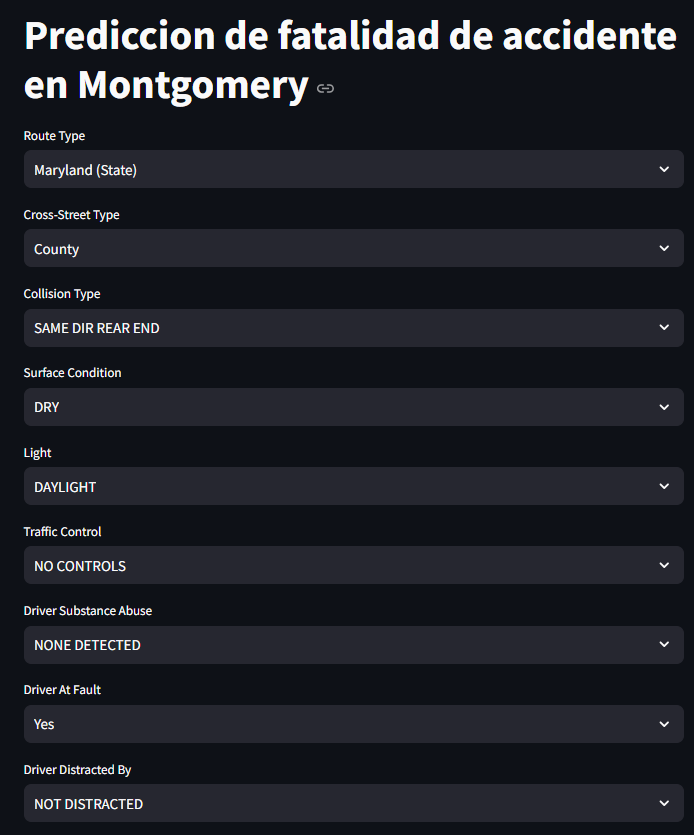

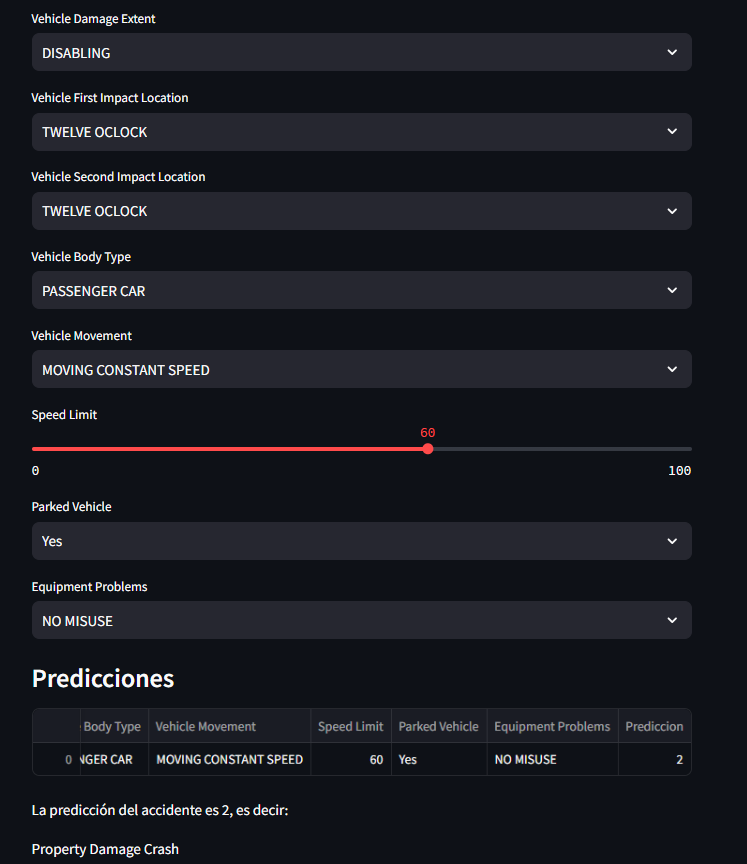